<a href="https://colab.research.google.com/github/gsranjitha897/gsranjitha897/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚢 Machine Learning Project: Predicting Titanic Survival with Logistic Regression 📊

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
!apt-get -qq install -y graphviz && pip install pydot
!pip install cartopy
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
import pandas as pd

In [ ]:
titanic_data=pd.read_csv("/content/ML Logistic Regression titanic.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
len(titanic_data)

891

In [ ]:
(titanic_data['Age'].isna().sum()/len(titanic_data))*100

19.865319865319865

In [ ]:
(titanic_data['Cabin'].isna().sum()/len(titanic_data))*100

77.10437710437711

<Axes: xlabel='Survived', ylabel='count'>

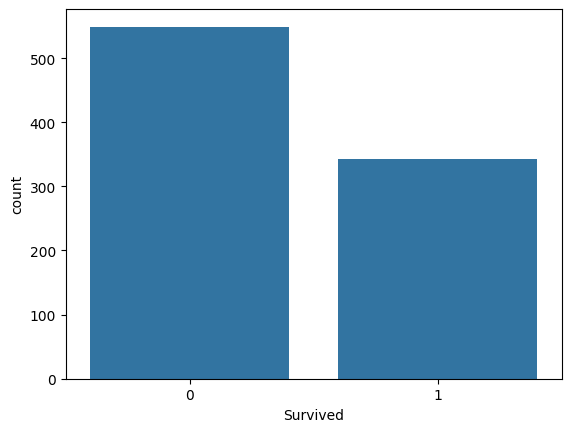

In [ ]:
import seaborn as sns

# Assuming 'Survived' is the column you want to plot
sns.countplot(x='Survived', data=titanic_data)


<Axes: xlabel='Survived', ylabel='count'>

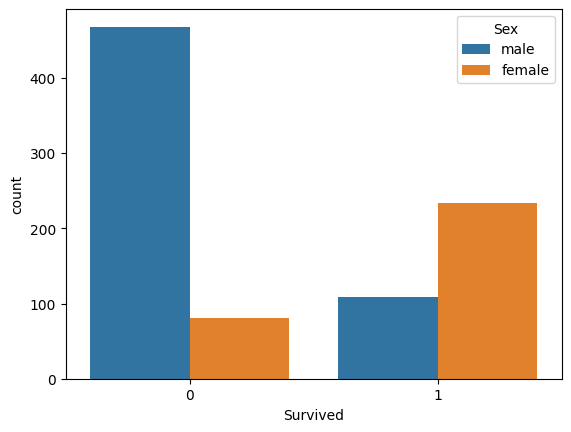

In [ ]:
sns.countplot(x='Survived', data=titanic_data, hue='Sex')

In [ ]:
titanic_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

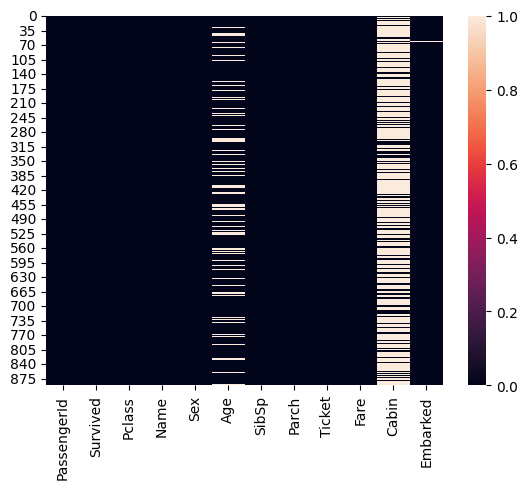

In [ ]:
sns.heatmap(titanic_data.isna())

In [ ]:
(titanic_data['Age'].isnull().sum()/len(titanic_data['Age'])) * 100

19.865319865319865

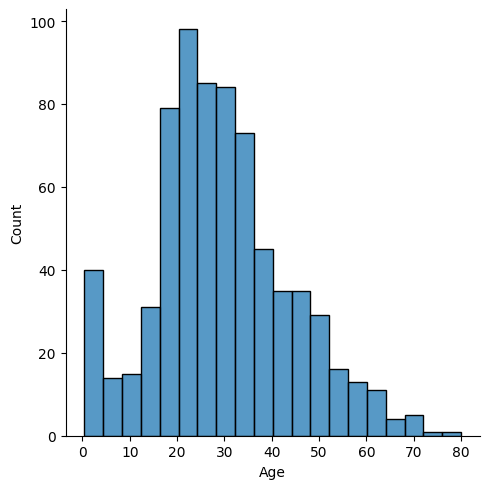

In [ ]:
import seaborn as sns
sns.displot(x='Age', data=titanic_data)

In [ ]:
titanic_data['Age'].mean()

29.69911764705882

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [ ]:
titanic_data['Age'].isnull().sum()

0

<Axes: >

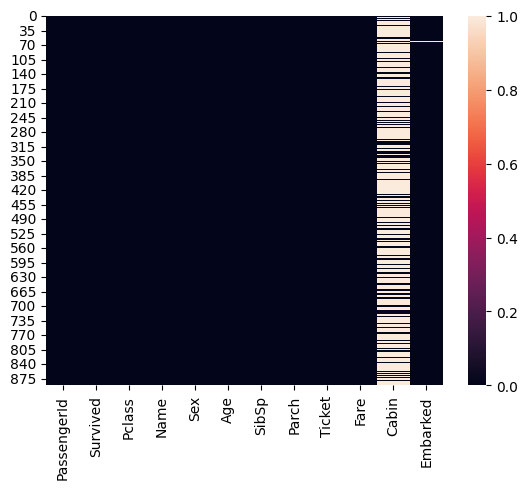

In [ ]:
sns.heatmap(titanic_data.isnull())

In [ ]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [ ]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)
gender

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [ ]:
titanic_data['Gender']=gender

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Gender       891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


In [ ]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'], axis=1 , inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,True
1,2,1,1,38.0,1,0,71.2833,False
2,3,1,3,26.0,0,0,7.9250,False
3,4,1,1,35.0,1,0,53.1000,False
4,5,0,3,35.0,0,0,8.0500,True


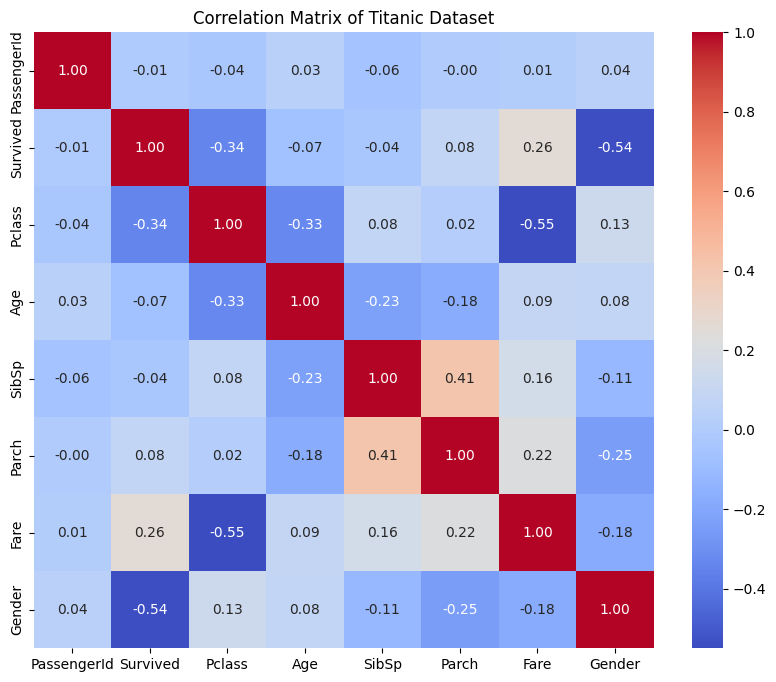

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

In [ ]:
# split the dataset into training data and testing data
X=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic_data['Survived']

In [ ]:
#OR

In [ ]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']


In [ ]:
X,y

(     PassengerId  Pclass        Age  SibSp  Parch     Fare  Gender
 0              1       3  22.000000      1      0   7.2500    True
 1              2       1  38.000000      1      0  71.2833   False
 2              3       3  26.000000      0      0   7.9250   False
 3              4       1  35.000000      1      0  53.1000   False
 4              5       3  35.000000      0      0   8.0500    True
 ..           ...     ...        ...    ...    ...      ...     ...
 886          887       2  27.000000      0      0  13.0000    True
 887          888       1  19.000000      0      0  30.0000   False
 888          889       3  29.699118      1      2  23.4500   False
 889          890       1  26.000000      0      0  30.0000    True
 890          891       3  32.000000      0      0   7.7500    True
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)


In [ ]:
print("\nMissing values in X_train:")
print(X_train.isnull().sum())

print("\nMissing values in X_test:")
print(X_test.isnull().sum())


Missing values in X_train:
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

Missing values in X_test:
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model=LogisticRegression()

In [ ]:
model

LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict=model.predict(X_test)

In [ ]:
predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#  y_test and predict are  actual and predicted labels, respectively

confusion_matrix(y_test,predict)


array([[151,  24],
       [ 37,  83]])

In [ ]:
print("\nConfusion Matrix (DataFrame):")
pd.DataFrame(confusion_matrix(y_test,predict) , columns=['Predicted No','Predicted Yes'], index=['Actual No','Actual Yes'])



Confusion Matrix (DataFrame):


,Predicted No,Predicted Yes
Actual No,151,24
Actual Yes,37,83


In [ ]:
print("\nClassifcation Report (DataFrame):")
pd.DataFrame(classification_report(y_test, predict, output_dict=True))


Classifcation Report (DataFrame):


,0,1,accuracy,macro avg,weighted avg
precision,0.803191,0.775701,0.79322,0.789446,0.792009
recall,0.862857,0.691667,0.79322,0.777262,0.793220
f1-score,0.831956,0.731278,0.79322,0.781617,0.791002
support,175.000000,120.000000,0.79322,295.000000,295.000000


In [ ]:
print("Train Accuray:", model.score(X_train,y_train))
print("Test Accuray:", model.score(X_test,y_test))

Train Accuray: 0.7919463087248322
Test Accuray: 0.7932203389830509
